EXECUTIVE SUMMARY


    Optimum Machine Model Chosen: KNeighbors Regressor
    Accuracy Score: 63%
    Cross Validation Score: 20%
    Key Operations executed: Exploratory Data Analysis(EDA), Data 
    Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and 
    Hyperparameter Tunning

# Problem Statement


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

The dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/bigdatamart_rep

ATTRIBUTES OF VARIABLES

1. Item_Identifier - A set of data elements permanently marked on an item that is globally unique and unambiguous and never                          changes in order to provide traceability of the item throughout its total life cycle. 

2. Item_Weight - This is the actual weight of the item

3. Item_Fat_Content - The amount of fat contained in an item.

4. Item_Visibility - The ability for shoppers to discover, identify, and engage with products.

5. Item_Type - This define the contents of the item and the information that is stored about it.

6. Item_MRP - Material Requirements Planning (MRP) is the system for calculating the materials and components needed to                       manufacture a particular item in an outlet/branch of a store.

7. Outlet_Identifier - The Unique identifier for each outlet/branch of various stores.

8. Outlet_Establishment_Year -  The year on which that an outlet of a store chooses to claim as its starting point.

9. Outlet_Size - The space and capacity of an outlet of a store.

10. Outlet_Location_Type - The particular place or position an outlet is positioned.

11. Outlet_Type - This refers to the nature and level of the store.

12. Item_Outlet_Sales - This is the amount of the exchange of a commodity for money generated by the outlet.

Importing the required Libraries: 

In [1]:
import numpy as np
import pandas as pd

#Libraries required for visualisation purpose
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [2]:
bdmtrain=pd.read_csv("bigdatamart_Train.csv")

bdmtrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#Checking the 1st 5 rows 
bdmtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking the last 5 rows
bdmtrain.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#checking the sample
bdmtrain.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
40,FDU02,13.35,Low Fat,0.102512,Dairy,230.6352,OUT046,1997,Small,Tier 1,Supermarket Type1,3435.5280
146,FDB11,16.00,Low Fat,0.060837,Starchy Foods,226.8404,OUT035,2004,Small,Tier 2,Supermarket Type1,6301.1312
6992,FDF08,14.30,Regular,0.000000,Fruits and Vegetables,89.8856,OUT018,2009,Medium,Tier 3,Supermarket Type2,1406.1696


# Data Descriptive Analysis

In [6]:
#checking the number of rows & columns in the dataset
bdmtrain.shape

(8523, 12)

Observations:
    The dataset has 8532 rows & 12 columns
   

     11 independet variables & 1 dependendt variable

In [7]:
#checking the nature of datat in each column
bdmtrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are 7 object columns & 5 float/integer columns in the dataset.

In [8]:
#checking the data info

bdmtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Some null values can be observed in Item_weight and Outlet size columns.

In [9]:
#Checking data description for all numerical columns
bdmtrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
#Checking data description for all non-numerical columns. 
#Assigning all non numeric columns to bdmtrain_non

bdmtrain_non=bdmtrain[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
bdmtrain_non.describe().T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [11]:
# checking the columns of the main dataset bdmtrain

In [12]:
bdmtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
#checking for null values whcihwe saw in information
bdmtrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#Checking for null values
bdmtrain.isnull().sum().sum()

3873

Total null values of both columns togetehr is 3873.

In [15]:
#Checking the content of each Categorical columns
bdmtrain['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Identifier Observations: 
- It is made up of Categorical data
- It has 1559 Unique data; FDW13,FDG33,NCY18,FDD38,DRE49 etc 
- It has no null values
- Its Datatype is an Object type


In [16]:
bdmtrain['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Fat_Content: 
- It is made up of Categorical data
- It has 5 factors; Low Fat(5089), Regular(2889), LF(316), reg(117), low fat(112)
- It has no null values
- Its Datatype is an Object type

In [17]:
bdmtrain['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Item_Type: 
- It is made up of Categorical data
- It has 16 factors; Fruits and Vegetables(1232), nack Foods(1200), Household(910), Frozen Foods(856), Dairy(682), Canned(649)                        Baking Goods(648), Health and Hygiene(520),Soft Drinks(445), Meat(425), Breads(251), Hard Drinks(214),                          Others(169), Starchy Foods(148),Breakfast(110),Seafood(64)
- It has no null values
- Its Datatype is an Object type

In [18]:
bdmtrain['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Outlet_Identifier: 
- It is made up of Categorical data
- It has 10 factors; OUT027(935), OUT013(932), OUT049(930), OUT046(930), OUT035(930), OUT045(929), OUT018(928), OUT017(926),OUT010(555), OUT019(528)
- It has no null values
- Its Datatype is an Object type

In [19]:
bdmtrain['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Size: 
- It is made up of Categorical data
- It has 3 factors; Medium(2793), Small(2388), High(932)
- It has null values to the tune of 2410
- Its Datatype is an Object type

In [20]:
bdmtrain['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

. Outlet_Location_Type: 
- It is made up of Categorical data
- It has 3 factors; Tier 3(3350), Tier 2(2785), Tier 1(238)
- It has no null values
- Its Datatype is an Object type

In [21]:
bdmtrain['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

 Outlet_Type: 
- It is made up of Categorical data
- It has 4 factors; Supermarket Type1(5577), Grocery Store(1083), Supermarket Type3(935), Supermarket Type2(928)
- It has no null values
- Its Datatype is an Object type

In [22]:
bdmtrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION

Count Distribution of Categorical Data - Univariate Analysis¶

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


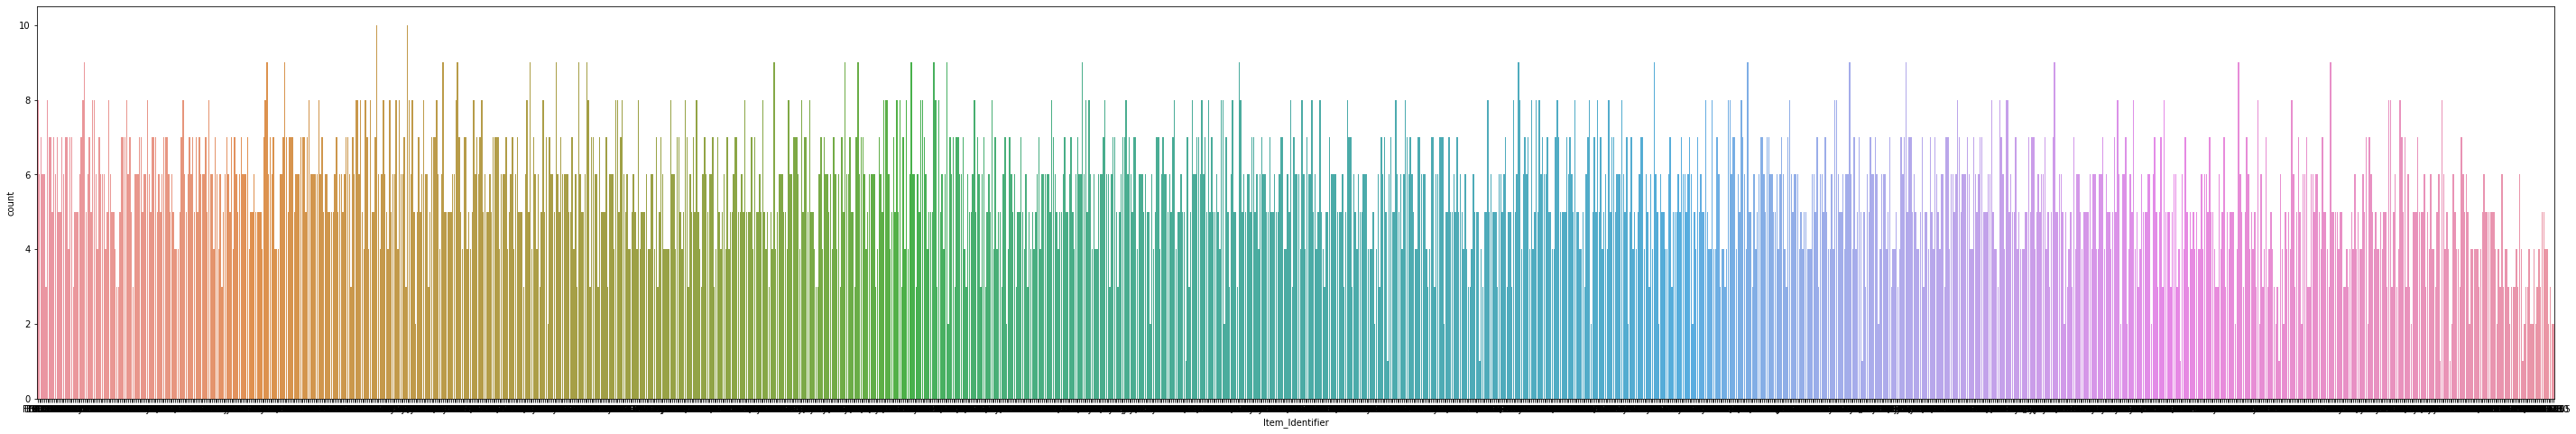

In [23]:
plt.figure(figsize=(50,8))
ax=sns.countplot(x='Item_Identifier',data=bdmtrain)

print(bdmtrain['Item_Identifier'].value_counts())

The Item_identifiers have a lot of factors(1559) which has affected the visibility of its plot

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

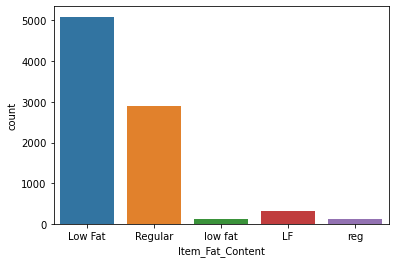

In [24]:
sns.countplot(bdmtrain['Item_Fat_Content'])

    There are 5 categories showing but Low Fat=low fat=LF. 
    So we bringing the data under 1 caetgory Low Fat
    Similarly Regular & reg are being brought together.
    Majority of the items are low fat

In [25]:
#bdmtrain['Item_Fat_Content']=bdmtrain['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat')

In [26]:
#bdmtrain['Item_Fat_Content']=bdmtrain['Item_Fat_Content'].replace(to_replace= 'low fat', value= 'Low Fat')

In [27]:
#bdmtrain['Item_Fat_Content']=bdmtrain['Item_Fat_Content'].replace(to_replace ='reg', value='Regular')

In [28]:
#sns.countplot(bdmtrain['Item_Fat_Content'])

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


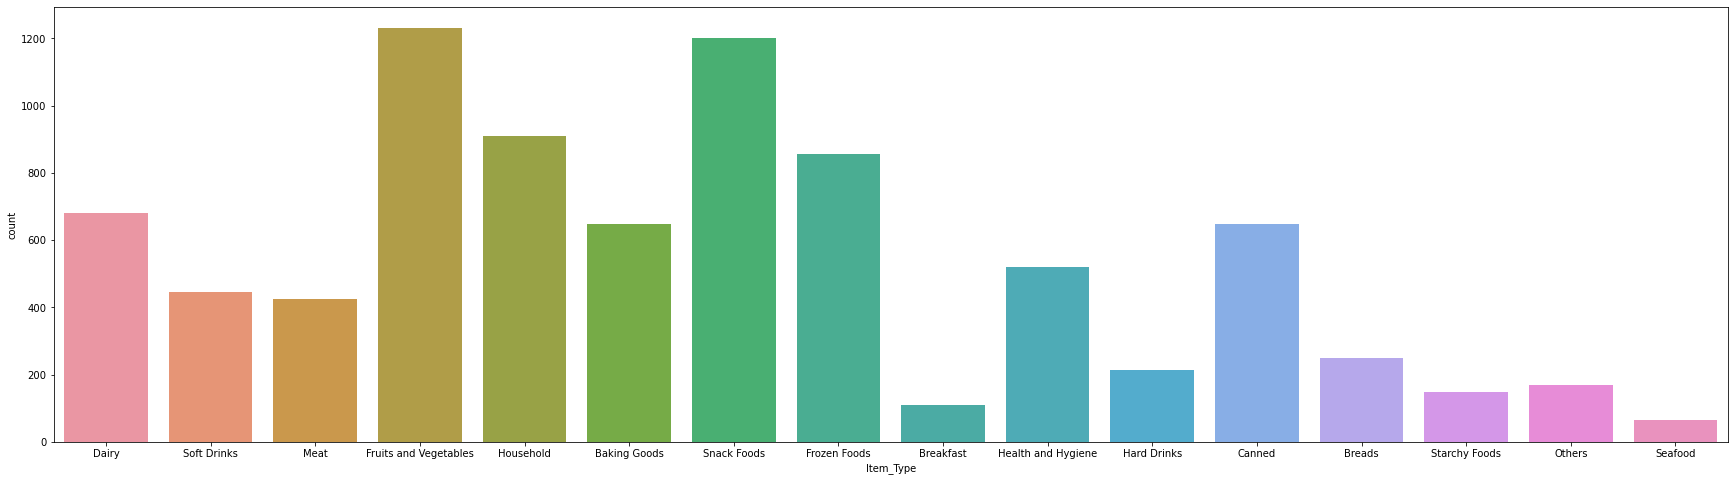

In [29]:
#Item_Type
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Item_Type',data=bdmtrain)
print(bdmtrain['Item_Type'].value_counts())

Majority of the sample items were fruits and vegitables followed by Snack Foods.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


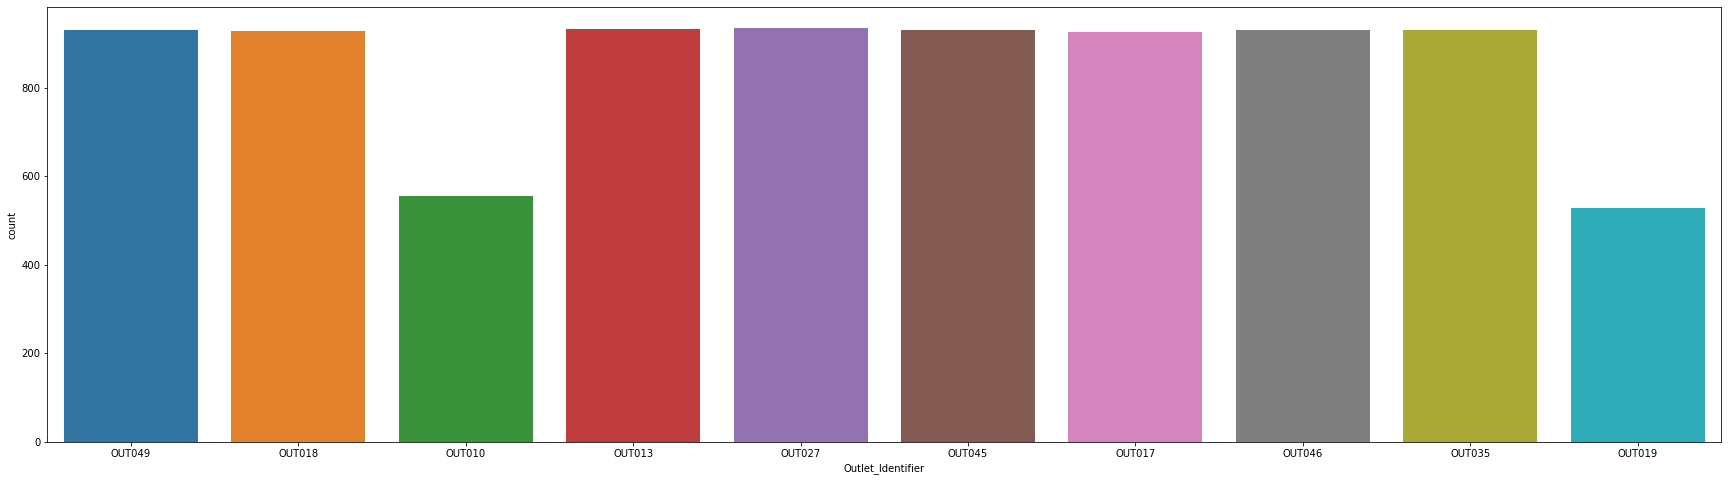

In [30]:
#Outlet_Identifier
plt.figure(figsize=(30,8))
ax=sns.countplot(x='Outlet_Identifier',data=bdmtrain)
print(bdmtrain['Outlet_Identifier'].value_counts())

Majority of the samples were selected from Outlet number 27.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


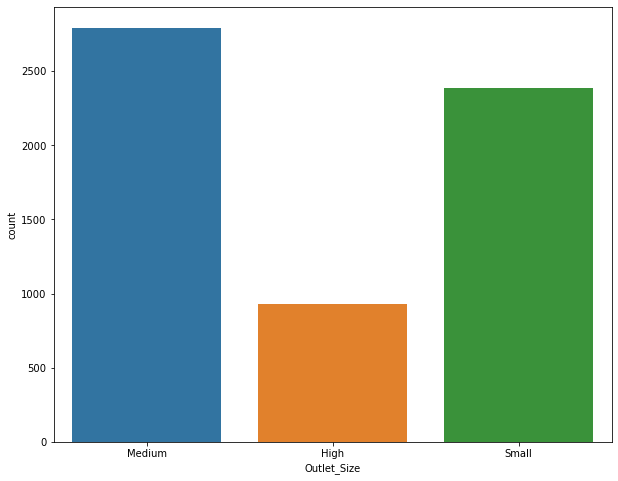

In [31]:
#Outlet_Size
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Size',data=bdmtrain)
print(bdmtrain['Outlet_Size'].value_counts())

Majority of the samples were selected from Outlets with Medium Sizes followed by small size.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


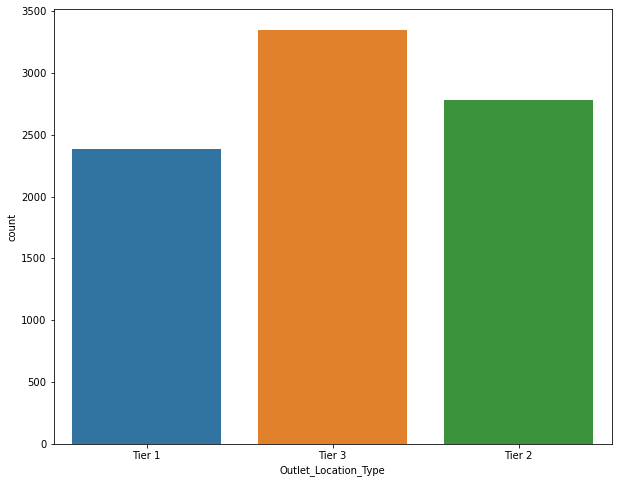

In [32]:
#Outlet_Location_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Location_Type',data=bdmtrain)
print(bdmtrain['Outlet_Location_Type'].value_counts())

Majority of the samples were selected from the Tier 3 Outlets

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


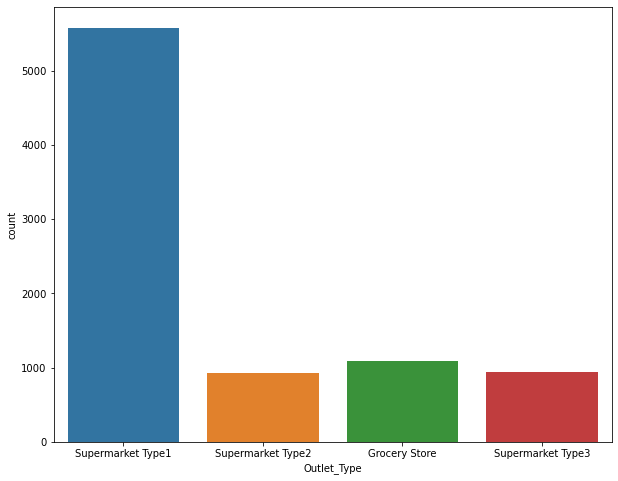

In [33]:
#Outlet_Type
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Outlet_Type',data=bdmtrain)
print(bdmtrain['Outlet_Type'].value_counts())

Majority of the samples were selected from Supermarket Type1

# Updating Null values

we will fill in the null values in Item_Weight(float) & Outlet_Size(categorical)
The categorical column we will fill with mode of the column & the Item weight we will fill with mean or median of the column.

Filling Nan values of Item_Weight

In [34]:
Itemweight_mean=bdmtrain['Item_Weight'].mean()
Itemweight_mean

12.857645184136183

In [35]:
bdmtrain['Item_Weight'].fillna(value= Itemweight_mean, inplace=True)

In [36]:
bdmtrain['Item_Weight'].isnull().sum()

0

In [37]:
outlet_mode=bdmtrain['Outlet_Size'].mode()
outlet_mode

0    Medium
dtype: object

In [38]:
bdmtrain['Outlet_Size'].fillna(bdmtrain['Outlet_Size'].mode()[0],inplace=True)

In [39]:
bdmtrain['Outlet_Size'].isnull().sum()

0

<AxesSubplot:>

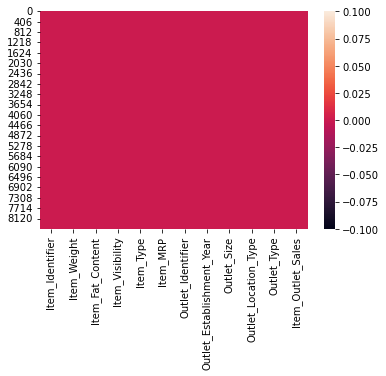

In [40]:
sns.heatmap(bdmtrain.isnull())

All null values in Train data have been updated.

# Encoding

We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [41]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder

In [42]:
oe=OrdinalEncoder()

In [43]:
bdmtrain['Item_Identifier']=oe.fit_transform(bdmtrain['Item_Identifier'].values.reshape(-1,1))
bdmtrain['Item_Fat_Content']=oe.fit_transform(bdmtrain['Item_Fat_Content'].values.reshape(-1,1))
bdmtrain['Item_Type']=oe.fit_transform(bdmtrain['Item_Type'].values.reshape(-1,1))
bdmtrain['Outlet_Identifier']=oe.fit_transform(bdmtrain['Outlet_Identifier'].values.reshape(-1,1))
bdmtrain['Outlet_Size']=oe.fit_transform(bdmtrain['Outlet_Size'].values.reshape(-1,1))
bdmtrain['Outlet_Location_Type']=oe.fit_transform(bdmtrain['Outlet_Location_Type'].values.reshape(-1,1))
bdmtrain['Outlet_Type']=oe.fit_transform(bdmtrain['Outlet_Type'].values.reshape(-1,1))
bdmtrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [44]:
bdmtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


In [45]:
bdmtrain.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976
8522,50.0,14.800,1.0,0.044878,14.0,75.4670,8.0,1997,2.0,0.0,1.0,765.6700


In [46]:
bdmtrain.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5491,1540.0,12.857645,0.0,0.060889,9.0,130.1968,5.0,1985,1.0,2.0,3.0,1565.9616
4364,836.0,19.700000,1.0,0.067040,13.0,178.3370,9.0,1999,1.0,0.0,1.0,1411.4960


In [47]:
bdmtrain.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [48]:
bdmtrain.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

All the categorical data have been converted into Numerical data.

# Normal Distribution Check(Univariate Analysis)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

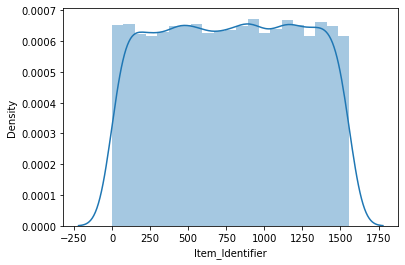

In [49]:
sns.distplot(bdmtrain['Item_Identifier'],kde=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

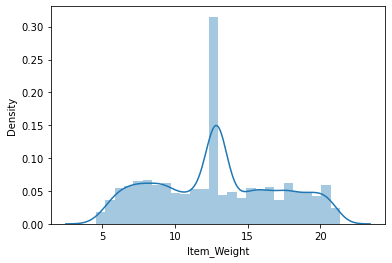

In [50]:
sns.distplot(bdmtrain['Item_Weight'],kde=True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

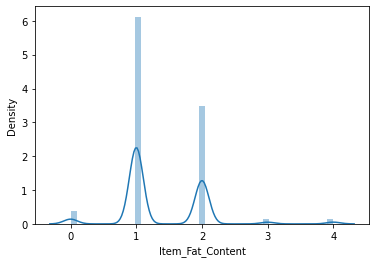

In [51]:
sns.distplot(bdmtrain['Item_Fat_Content'], kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

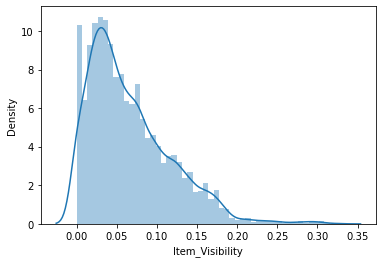

In [52]:
sns.distplot(bdmtrain['Item_Visibility'], kde=True)

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

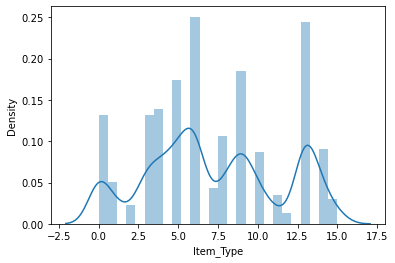

In [53]:
sns.distplot(bdmtrain['Item_Type'],kde=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

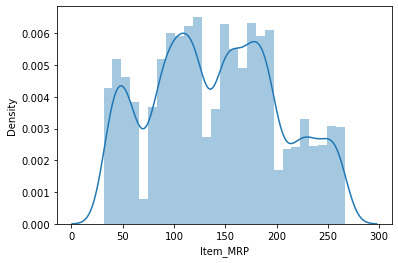

In [54]:
sns.distplot(bdmtrain['Item_MRP'],kde=True)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Density'>

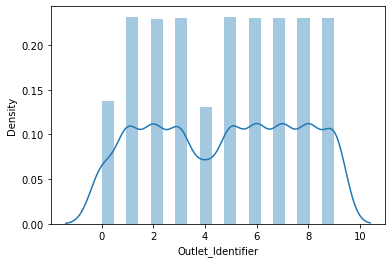

In [55]:
sns.distplot(bdmtrain['Outlet_Identifier'],kde=True)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

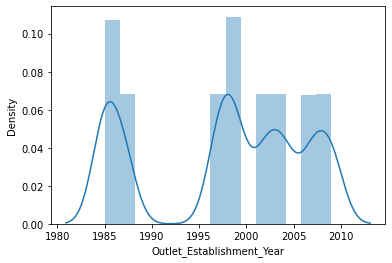

In [56]:
sns.distplot(bdmtrain['Outlet_Establishment_Year'],kde=True)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

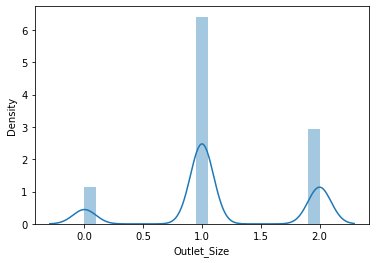

In [57]:
sns.distplot(bdmtrain['Outlet_Size'],kde=True)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

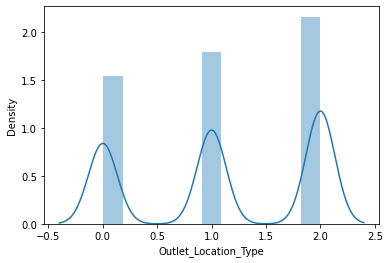

In [58]:
sns.distplot(bdmtrain['Outlet_Location_Type'],kde=True)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

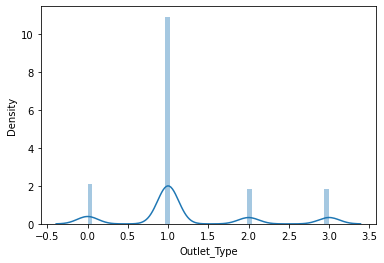

In [59]:
sns.distplot(bdmtrain['Outlet_Type'],kde=True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

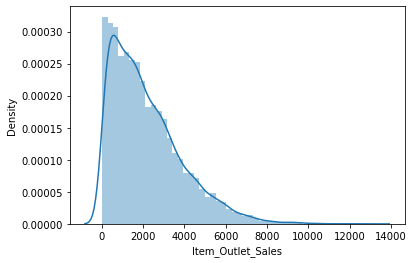

In [60]:
sns.distplot(bdmtrain['Item_Outlet_Sales'],kde=True)

From the above density plot:

We can see that All the features do not follow a normal distribution.

The normal distribution of these features; 'Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier' 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type' has no contribution to our Model Building since they are categorical data

The normal distribution of the Item_Outlet_sales columns also has no contribution to our Model Building since its the Target variable

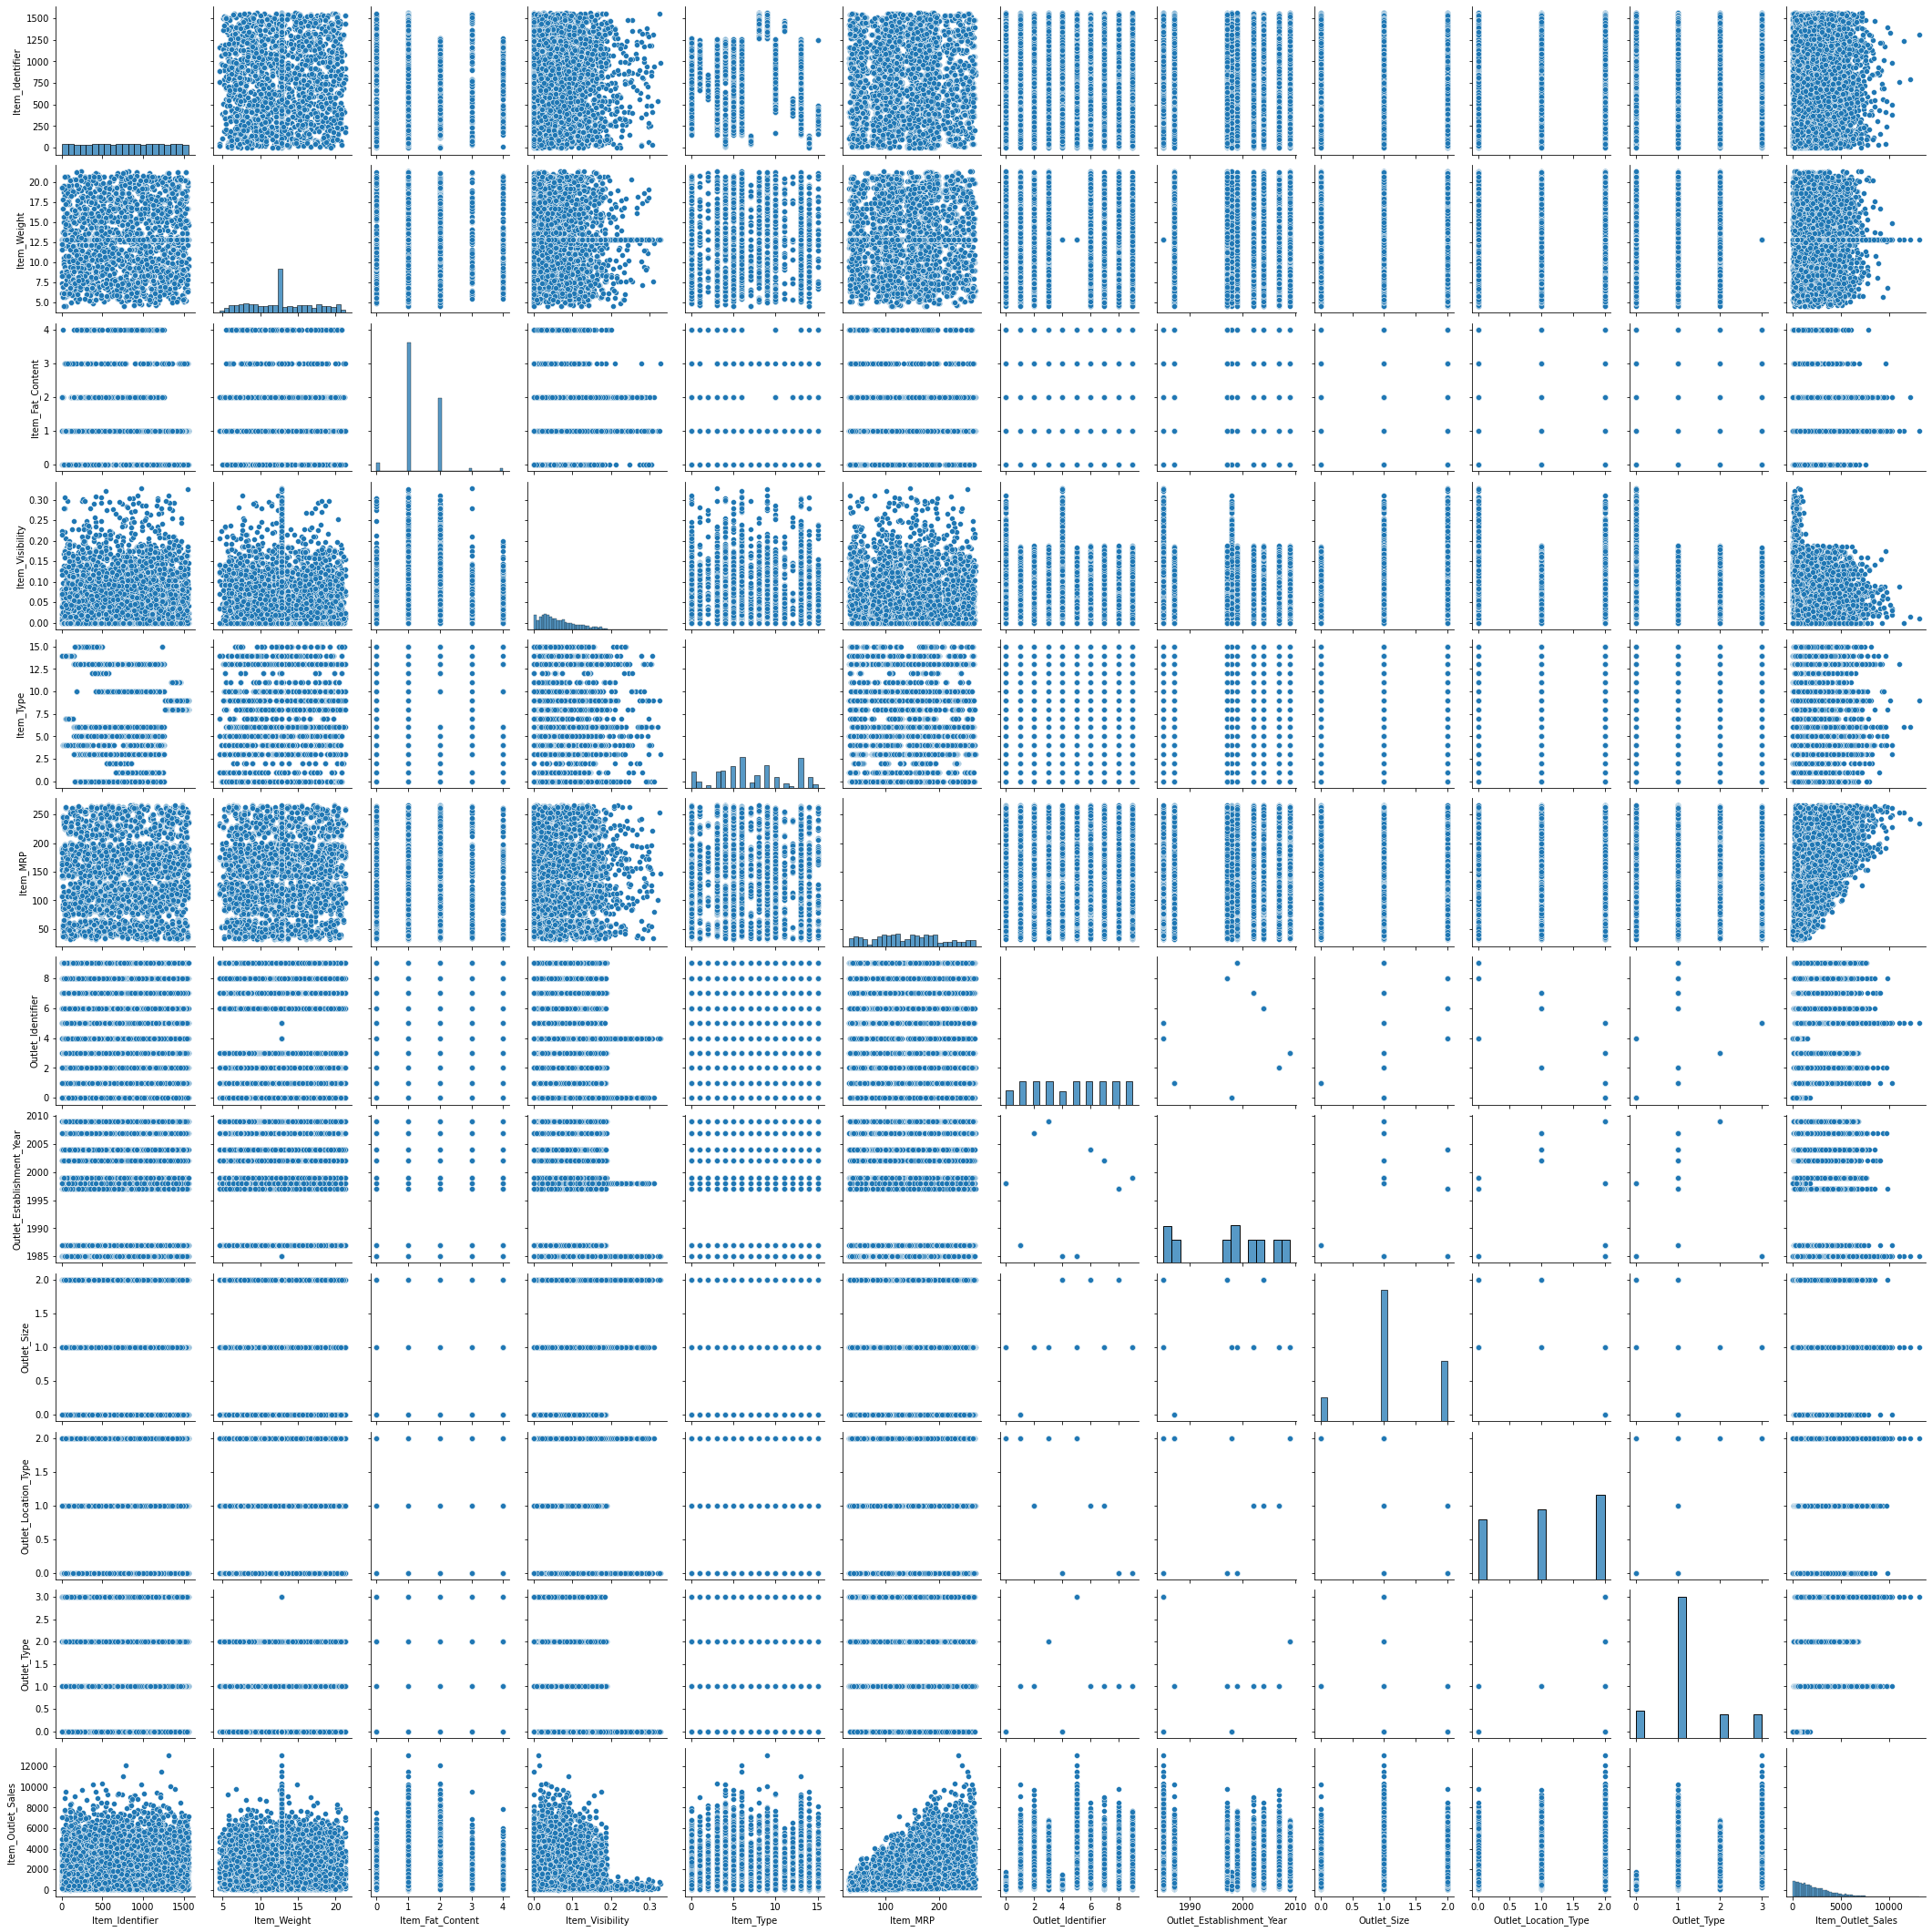

In [61]:
sns.pairplot(bdmtrain)

Observations:
    There is a correlation between Item_MRP & Item_Outlet _Sales.
    Increase in the item_visibility can decrease the item outlet sales because it is having negative correlation.
    Item_weight & Outlet_Establishment_Year have no correlation with Item_Outllet_Sales.

# Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis

Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [62]:
#checking for general correlation
bdmtrain.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


In [63]:
#checking for correlation between each feature and Label
bdmtrain.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Fat_Content             0.009800
Item_Weight                  0.011550
Item_Type                    0.017048
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

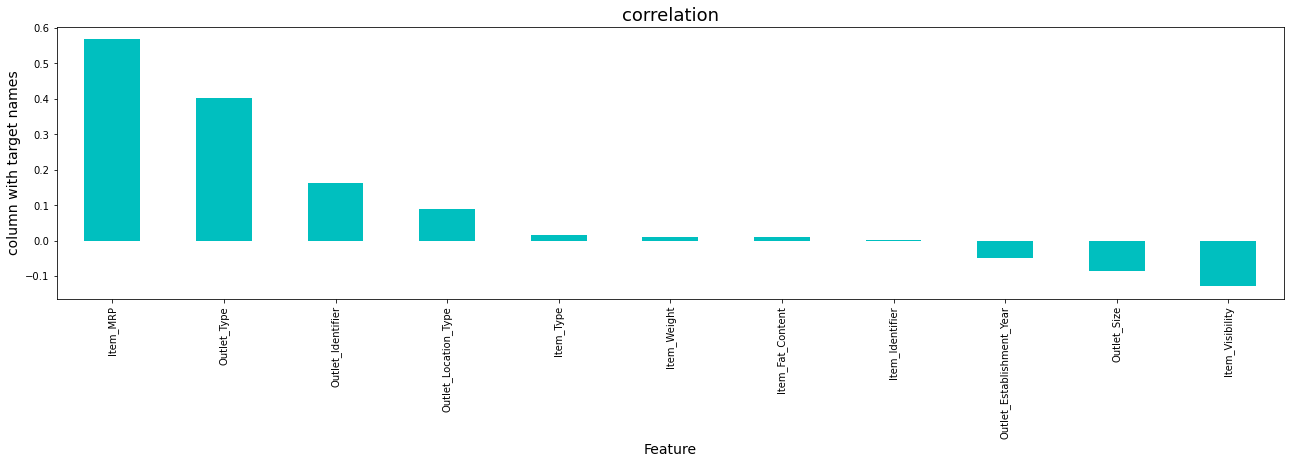

In [64]:
plt.figure(figsize=(22,5))
bdmtrain.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar', color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Multicollinearity Check

<AxesSubplot:>

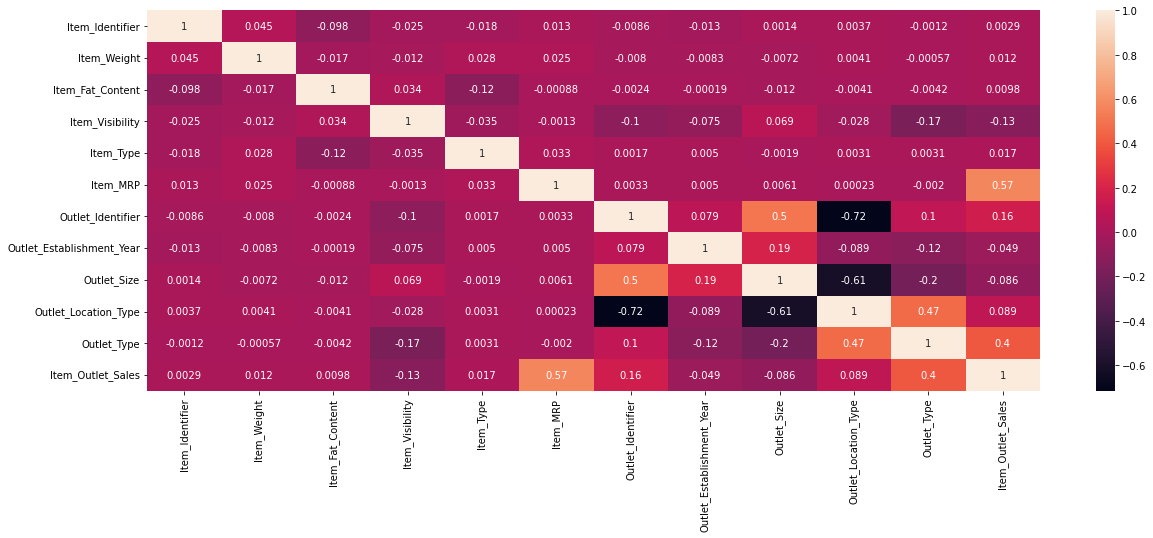

In [65]:
plt.figure(figsize=(20,7))
sns.heatmap(bdmtrain.corr(), annot=True)

Observations: Item_MRP is highly correlated with Item_Outlet_sales.
    Item_visiblity is negatively correlated with Item_Outlet_sales.
    Item_MRP has 57% coorelation with Item_Outlet sales.
    Item_weight & Outlet_Establishment_Year have least correlation with Item_Outllet_Sales.
    Feature with Maximum correlation = '57%'
    Feature with Minimum correlation = '0.2%'

Multicollinearity:
Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!
From the heatmap we can see that the ALMOST ALL pairs of features DOES NOT have noticeable correllation between them

Checking for Outliers

Item_Identifier                  AxesSubplot(0.125,0.71587;0.227941x0.16413)
Item_Weight                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Item_Fat_Content              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Item_Visibility                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
Item_Type                    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Item_MRP                     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.321957;0.227941x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Outlet_Size                  AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Outlet_Location_Type               AxesSubplot(0.125,0.125;0.227941x0.16413)
Outlet_Type                     AxesSubplot(0.398529,0.125;0.227941x0.16413)
Item_Outlet_Sales               AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

<Figure size 1080x648 with 0 Axes>

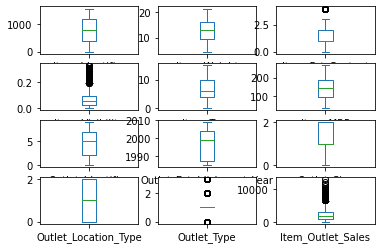

In [66]:
plt.figure(figsize=(15,9))

bdmtrain.plot(kind='box',subplots= True, layout=(4,3))

 From the above visualization plot its evident that the item_visibility feature posses outliers.
 
 -  The outlier of the categorical data does not impact our model
 
 - The outlier of the Target data does not impact our model

<AxesSubplot:xlabel='Item_Visibility'>

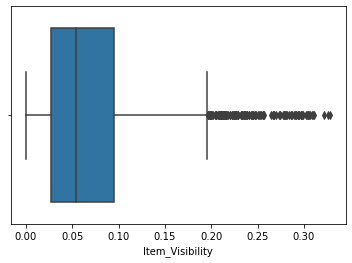

In [67]:
sns.boxplot(bdmtrain['Item_Visibility'])

In [68]:
#Checking for skewness in each independent variable.
bdmtrain.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence the below features are skewed:

- Item visibility
- Item_Fat_Content
- Outlet_Type

# DATA PREPROCESSING

 Removal of Duplicates and Unwanted Column

In [69]:
bdmtrain.drop_duplicates(inplace =True)
bdmtrain.shape

(8523, 12)

It appears there are no duplicates as there is no change in the number of rows.

Dropping of Features that strongly promotes multicollinearity(VIF)

The heatmap does not show any coorelation between 2 variables.

    To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
x=bdmtrain.iloc[:,0:-1]
x.shape

(8523, 11)

In [72]:
y=bdmtrain.iloc[:,-1]
y.shape

(8523,)

In [73]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x_scaled

array([[-1.38851383, -0.84187169, -0.57284357, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.71799137, -1.64170589,  0.97809218, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-0.26205684,  1.09855449, -0.57284357, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [ 1.28515188, -0.53424315, -0.57284357, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-0.21975905, -1.33644372,  0.97809218, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-1.62449099,  0.45963367, -0.57284357, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [74]:
x_scaled.shape

(8523, 11)

In [75]:
    import statsmodels.api as sm
    from scipy import stats
    from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif=pd.DataFrame()

In [77]:
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [78]:
vif['Features'] = x.columns
vif

,vif,Features
0,1.013706,Item_Identifier
1,1.003732,Item_Weight
2,1.025474,Item_Fat_Content
3,1.064255,Item_Visibility
4,1.017436,Item_Type
5,1.001978,Item_MRP
6,4.149231,Outlet_Identifier
7,1.082108,Outlet_Establishment_Year
8,1.715129,Outlet_Size
9,5.866098,Outlet_Location_Type


Here there doesnt seem to be any multicollinearity problem. Hence we are not removing any column.

Checking out for Outliers using Zscore

In [79]:
import scipy.stats
from scipy.stats import zscore

In [80]:
z=np.abs(zscore(bdmtrain))
z

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.388514,0.841872,0.572844,0.970732,0.766479,1.747454,1.507813,0.139541,0.284581,1.369334,0.252658,0.910601
1,1.717991,1.641706,0.978092,0.908111,1.608963,1.489023,0.607071,1.334103,0.284581,1.091569,1.002972,1.018440
2,0.262057,1.098554,0.572844,0.956917,0.658786,0.010040,1.507813,0.139541,0.284581,1.369334,0.252658,0.049238
3,0.759769,1.500838,0.978092,1.281758,0.291391,0.660050,1.664513,0.020085,0.284581,1.091569,1.508289,0.849103
4,1.151580,0.929428,0.572844,1.281758,0.421242,1.399220,1.312032,1.293934,1.950437,1.091569,0.252658,0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.912107,1.418084,0.572844,0.181193,1.371418,1.180783,1.312032,1.293934,1.950437,1.091569,0.252658,0.349915
8519,0.261100,1.059578,0.978092,0.371154,1.716656,0.527301,0.802852,0.497909,0.284581,0.138882,0.252658,0.956402
8520,1.285152,0.534243,0.572844,0.599784,0.183698,0.897208,0.450371,0.736822,1.381274,0.138882,0.252658,0.579100
8521,0.219759,1.336444,0.978092,1.532880,1.371418,0.607977,0.607071,1.334103,0.284581,1.091569,1.002972,0.196725


In [81]:
#checking datashape of z
z.shape

(8523, 12)

In [82]:
threshold =3
np.where(z>3)
len(np.where(z>3)[0])

302

In [83]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
bdmtrain_new=bdmtrain[(z<3).all(axis=1)]

#old Dataset
print("Old DataFrame",bdmtrain.shape)
#Dataset after removal of outliers
print("New DataFrame",bdmtrain_new.shape)#Data without outliers
# total rows deleted
print("total_dropped_rows",bdmtrain.shape[0]-bdmtrain_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (8523, 12)
New DataFrame (8222, 12)
total_dropped_rows 301


In [84]:
    #dataset after removignoutliers
    bdmtrain_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [85]:
#Lets reset our data having removed outliers
bdmtrain_new.reset_index(inplace=True)
bdmtrain_new

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8217,8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8218,8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8219,8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8220,8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [86]:
#dropping the index columns which is not needed
bdmtrain_new.drop('index', axis=1,inplace=True)
bdmtrain_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8218,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8219,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8220,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


Item_Identifier                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Weight                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Fat_Content             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_Visibility              AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Item_Type                       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Item_MRP                     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Identifier            AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Outlet_Size                        AxesSubplot(0.125,0.125;0.168478x0.222059)
Outlet_Location_Type            AxesSubplot(0.327174,0.125;0.168478x0.222059)
Outlet_Type                     AxesSubplot(0.529348,0.125;0.168478x0.222059)
Item_Outlet_Sales               AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

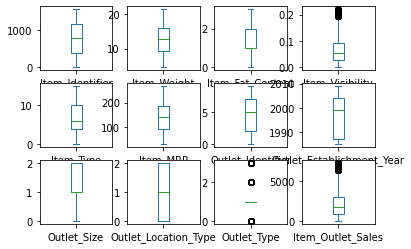

In [87]:
#rechecking for outleirs after droppign outliers
bdmtrain_new.plot(kind= 'box', subplots=True, layout = (3,4))

Transforming Data to Remove Skewness using Power transformation

In [88]:
from sklearn.preprocessing import power_transform

In [89]:
bdmtrain_new.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

From the above the below features are skewed based on a threshold of +/-0.4
- Item Visibility
- Outlet_Type
- Outlet_Establishment_Year

In [90]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method ='yeo-johnson')

In [91]:
#extracting the columns that are skewed
data=['Item_Visibility','Outlet_Type','Outlet_Establishment_Year']

In [92]:
#Now removing skewness by Power Transformation a nd updating dataset(bdmtrain_new) with result
bdmtrain_new[data] = scaler.fit_transform(bdmtrain_new[data].values)

In [93]:
bdmtrain_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,-1.139908,4.0,249.8092,9.0,0.031704,1.0,0.0,-0.135081,3735.1380
1,8.0,5.920,2.0,-1.030767,14.0,48.2692,3.0,1.451492,1.0,2.0,1.054850,443.4228
2,662.0,17.500,1.0,-1.115560,10.0,141.6180,9.0,0.031704,1.0,0.0,-0.135081,2097.2700
3,1121.0,19.200,2.0,-1.731271,6.0,182.0950,0.0,-0.093218,1.0,2.0,-1.971736,732.3800
4,1297.0,8.930,1.0,-1.731271,9.0,53.8614,1.0,-1.293670,0.0,2.0,-0.135081,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,370.0,6.865,1.0,0.033454,13.0,214.5218,1.0,-1.293670,0.0,2.0,-0.135081,2778.3834
8218,897.0,8.380,2.0,-0.212089,0.0,108.1570,7.0,0.424107,1.0,1.0,-0.135081,549.2850
8219,1357.0,10.600,1.0,-0.536583,8.0,85.1224,6.0,0.701080,2.0,1.0,-0.135081,1193.1136
8220,681.0,7.210,2.0,1.535383,13.0,103.1332,3.0,1.451492,1.0,2.0,1.054850,1845.5976


In [94]:
#rechecking for skewness
bdmtrain_new.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.116318
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.222552
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.010506
Item_Outlet_Sales            0.877476
dtype: float64

From the above all skewness in all continuos data are now within the threshold of +/-0.5.

All continuos data columns was considered for skewness removal
The Item_Outlet_Sales column is not considered for skewness since its the Target data

In [95]:
x=bdmtrain_new.iloc[:,0:-1]
x.shape

(8222, 11)

In [96]:
y=bdmtrain_new.iloc[:,-1]
y.shape

(8222,)

In [97]:
#transforming dataset into a standard normal distribution
sc=StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-1.38525904, -0.83758301, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.13508106],
       [-1.71298557, -1.6325653 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.05485046],
       [-0.26478859,  1.09107226, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.13508106],
       ...,
       [ 1.2741975 , -0.53182058, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.13508106],
       [-0.22271559, -1.3291549 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.05485046],
       [-1.6199821 ,  0.45602723, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.13508106]])

Standard scaler will bring mean to zero and standard deviation to 1

In [98]:
#reconfirming that mean is 0
print(x_scaled.mean())
print(x_scaled.std())

-1.8167776878499277e-19
1.0


MODEL BUILDING

LinearRegression

In [99]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20)

In [101]:
lr=LinearRegression()

In [102]:
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
lr.score(x_train,y_train)

0.5126551836414202

In [104]:
x_predict=lr.predict(x_test)

In [105]:
x_predict

array([3701.82235388, -925.45272663, 2910.54577541, ..., 3266.95100282,
       1069.03766413, 2200.20752703])

In [106]:
lr.coef_

array([ 3.60244111e+00, -3.87058709e-01,  3.06631922e+01, -3.03135362e+01,
        5.93956085e+00,  9.05764895e+02,  5.13250925e+01, -5.36211656e+01,
       -1.26992602e+02, -2.13688537e+02,  6.99183108e+02])

In [107]:
lr.intercept_

2134.9439842603624

In [108]:
print("Mean Absolute error:",mean_absolute_error(y_test,x_predict))
print("Mean Squared error:", mean_squared_error(y_test,x_predict))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,x_predict)))
li_sc=(r2_score(y_test,x_predict))
print("The test Accuracy score for linear regression is",li_sc)

Mean Absolute error: 864.064468276417
Mean Squared error: 1268702.9645419484
Root Mean Squared error: 1126.36715352586
The test Accuracy score for linear regression is 0.5281485155260617


Checking for overfitting in Linear Regression model.

In [109]:
scr=cross_val_score(lr,x,y,cv=5)
print(scr)
print(round(scr.std()),2)
print("The cv score for Linear Regression:",scr.mean())

[0.52657745 0.51315273 0.49805988 0.51898759 0.5132967 ]
0 2
The cv score for Linear Regression: 0.5140148669656585


Difference between Accuracy Score and Cross Validation Score

In [110]:
#test accuracy score of linear regression
li_sc

0.5281485155260617

In [111]:
#CV score for linear regression
cv_linear=scr.mean()
cv_linear

0.5140148669656585

In [112]:
lr_Acc_vs_CV_Score=np.abs(li_sc-cv_linear)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.014133648560403222


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.0014) meaning that model is not having any overfitting or underfitting problems

In [113]:
#Using KNeighbors Regressor 
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [114]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20)

In [116]:
knn.score(x_train,y_train)

0.6264383573249597

In [117]:
predict_x=knn.predict(x_test)
predict_x

array([1916.70504, 2450.67664, 2175.70124, ..., 3044.7034 , 4259.1226 ,
        734.24424])

In [118]:
knn_acc_test=r2_score(y_test,predict_x)
print("Accuracy test score for KNN:", knn_acc_test)                
print("Mean Absolute error:",mean_absolute_error(y_test,predict_x))
print("Mean Squared error:", mean_squared_error(y_test,predict_x))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predict_x)))

Accuracy test score for KNN: 0.6253212651038358
Mean Absolute error: 715.429339112462
Mean Squared error: 964711.4740213129
Root Mean Squared error: 982.1972683841637


Checking Cross Validation score 

In [119]:
scr=cross_val_score(knn,x,y,cv=5)
print(scr)
print(scr.std())
cv_knn=scr.mean()
print('The CV score of Knn:',cv_knn)

[0.19430217 0.20548745 0.17657435 0.20036413 0.19590191]
0.009782044787446919
The CV score of Knn: 0.19452600290541977


In [120]:
knn_acc_test_vs_CV_Score=np.abs(knn_acc_test-cv_knn)
print("Difference between Accuracy and Cross Validation Score of Knn = ",knn_acc_test_vs_CV_Score)

Difference between Accuracy and Cross Validation Score of Knn =  0.430795262198416


From the above you can see that difference between Accuracy and Cross Validation score is negligible (0.293) meaning that model is not having any overfitting or underfitting problems

In [121]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(alpha=0.001)

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20)

In [123]:
sgd.fit(x_train,y_train)
score=sgd.score(x_train,y_train)
predict_y=sgd.predict(x_test)
score_t=sgd.score(x_test,y_test)


In [124]:
sgd_acc_test=r2_score(y_test,predict_y)
print("Accuracy test score for sgd:", sgd_acc_test)                
print("Mean Absolute error:",mean_absolute_error(y_test,predict_y))
print("Mean Squared error:", mean_squared_error(y_test,predict_y))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predict_y)))

Accuracy test score for sgd: 0.5098822407330914
Mean Absolute error: 834.6927331236309
Mean Squared error: 1174046.3688404495
Root Mean Squared error: 1083.5342028936832


Checking Cross Validation score of SGDRegressor

In [125]:
sgd_sc=cross_val_score(sgd, x,y,cv=5)

print(sgd_sc)
print(sgd_sc.std())
cv_sgd=sgd_sc.mean()
print('The CV score of SGD:',cv_sgd)


[-4.64686051e+20 -7.84821530e+21 -7.60501092e+20 -6.60184710e+20
 -1.01044987e+22]
4.1524832695732084e+21
The CV score of SGD: -3.967617175772393e+21


Difference between Accuracy Score and Cross Validation Score

In [126]:
#test accuracy score of SGD regression
sgd_acc_test

0.5098822407330914

In [127]:
#CV score for SGD regression
cv_sgd

-3.967617175772393e+21

In [128]:
sgd_acc_test_vscv_sgd=np.abs(sgd_acc_test-cv_sgd)
print("Difference between Accuracy and Cross Validation Score of SGD Regressor= ",sgd_acc_test_vscv_sgd)

Difference between Accuracy and Cross Validation Score of SGD Regressor=  3.967617175772393e+21


#Using Support Vector Regressor(SVR)

In [129]:
from sklearn.svm import SVR

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20)

In [131]:
svr=SVR()

In [132]:
svr.fit(x_train,y_train)

SVR()

In [133]:

score=svr.score(x_train,y_train)
predict_y=svr.predict(x_test)
score_t=svr.score(x_test,y_test)

In [134]:
svr_acc_test=r2_score(y_test,predict_y)
print("Accuracy test score for SVR:", svr_acc_test)                
print("Mean Absolute error:",mean_absolute_error(y_test,predict_y))
print("Mean Squared error:", mean_squared_error(y_test,predict_y))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predict_y)))

Accuracy test score for SVR: 0.0653645571876652
Mean Absolute error: 1170.6445747983075
Mean Squared error: 2311904.1059436817
Root Mean Squared error: 1520.494691192206


Checking Cross Validation score of SVR

In [135]:
svr_sc=cross_val_score(svr, x,y,cv=5)

print(svr_sc)
print(svr_sc.std())
cv_svr=svr_sc.mean()
print('The CV score of SGD:',cv_svr)

[-0.03910638 -0.01888698 -0.04920218 -0.02933127 -0.02162937]
0.011245968907499019
The CV score of SGD: -0.031631236651479974


In [136]:
#Difference between Accuracy Score and Cross Validation Score
svr_acc_test_vscv_svr=np.abs(svr_acc_test-cv_svr)
print("Difference between Accuracy and Cross Validation Score of SGD Regressor= ",svr_acc_test_vscv_svr)

Difference between Accuracy and Cross Validation Score of SGD Regressor=  0.09699579383914518


# GradientBoostingRegressor

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

In [138]:
gb=GradientBoostingRegressor()

In [139]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20)

In [141]:
#training score
gb.score(x_train,y_train)

0.6162348249485521

In [142]:
predict_y=gb.predict(x_test)

In [143]:
#testing score
gb_acc_test=r2_score(y_test,predict_y)
print("Accuracy test score for GB:", gb_acc_test)                
print("Mean Absolute error:",mean_absolute_error(y_test,predict_y))
print("Mean Squared error:", mean_squared_error(y_test,predict_y))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,predict_y)))

Accuracy test score for GB: 0.6225844854160496
Mean Absolute error: 710.9117077328474
Mean Squared error: 943198.9867626787
Root Mean Squared error: 971.1843217240889


Checking Cross Validation score of GradientBoostingRegressor

In [144]:
gb_sc=cross_val_score(gb, x,y,cv=5)

print(gb_sc)
print(gb_sc.std())
cv_gb=gb_sc.mean()
print('The CV score of SGD:',cv_gb)

[0.5857443  0.57666706 0.56584088 0.58967908 0.59185021]
0.009587102867476468
The CV score of SGD: 0.5819563063615635


COMPARING ALL MACHINE LEARNING MODELS

Creating a dataframe that will show the metrics of all the models.

In [145]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['Linear Regression','KNeigbors Regressor','SGD Regressor','SVR'],'Accuracy_Score' : [li_sc,knn_acc_test,sgd_acc_test,svr_acc_test],'Cross_Validation_Score':[cv_linear,cv_knn,cv_sgd,cv_svr],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,knn_acc_test_vs_CV_Score,sgd_acc_test_vscv_sgd,svr_acc_test_vscv_svr] })
models

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
0,Linear Regression,0.528149,5.140149e-01,1.413365e-02
1,KNeigbors Regressor,0.625321,1.945260e-01,4.307953e-01
2,SGD Regressor,0.509882,-3.967617e+21,3.967617e+21
3,SVR,0.065365,-3.163124e-02,9.699579e-02


In [146]:
#Converting Accuracy and Cross_Validation_Score into Percentage.
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore
1,KNeigbors Regressor,63.0,2.000000e+01,4.307953e-01
0,Linear Regression,53.0,5.200000e+01,1.413365e-02
2,SGD Regressor,51.0,-3.967617e+23,3.967617e+21
3,SVR,7.0,-3.000000e+00,9.699579e-02


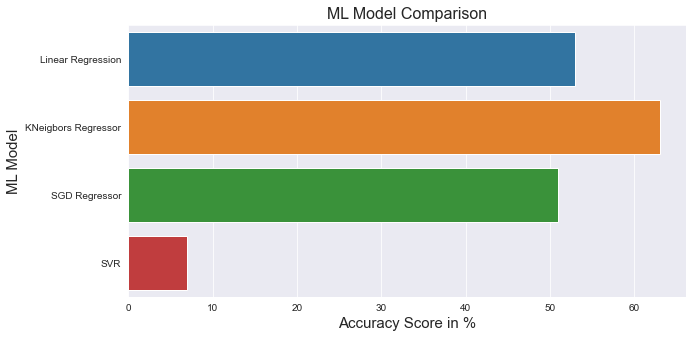

In [147]:
#Plotting the accuracy score

plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram clearly Kneighbors Regressor(64%) has the highest Accuracy.

HYPERPARAMETER TUNNING

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
knn=KNeighborsRegressor()

In [151]:
parameter={'n_neighbors': [5,10], 'leaf_size':[10,20,30]}

In [152]:
#Gridsearch for hyperparameter tunning
gridsearch = GridSearchCV(knn, parameter, cv=5)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30], 'n_neighbors': [5, 10]})

In [153]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [154]:
knn.score(x_train,y_train)

0.6680974481105759

In [155]:
pred_x=knn.predict(x_test)

In [156]:
print(r2_score(pred_x,y_test))

0.14298859456846935


# MODEL SAVING

In [157]:
import pickle

In [158]:
filename='Machine_Model_Project_Big_Data_Mart'
pickle.dump(knn,open(filename,'wb'))